In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
672,673,15721024,Wickens,642,France,Male,26,0,0.00,1,0,0,47472.68,0
7298,7299,15789865,Nnaife,620,France,Male,28,9,71902.52,1,0,1,190208.23,0
3412,3413,15782802,Beneventi,582,Germany,Male,26,6,114450.32,1,1,1,14081.64,0
6154,6155,15598162,Saunders,754,Germany,Female,39,3,160761.41,1,1,1,24156.03,0
7202,7203,15671014,Zhdanova,573,Spain,Female,72,8,98765.84,1,1,1,96015.53,0


In [59]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# data cleaning

remove unwanted columns

In [5]:
df0 = df.drop('customerID' , axis=1 )

view object columns unique values

In [6]:
for col in df0:
    if df0[col].dtype == 'object':
        print(col , ' - ' , df0[col].unique())

gender  -  ['Female' 'Male']
Partner  -  ['Yes' 'No']
Dependents  -  ['No' 'Yes']
PhoneService  -  ['No' 'Yes']
MultipleLines  -  ['No phone service' 'No' 'Yes']
InternetService  -  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  -  ['No' 'Yes' 'No internet service']
OnlineBackup  -  ['Yes' 'No' 'No internet service']
DeviceProtection  -  ['No' 'Yes' 'No internet service']
TechSupport  -  ['No' 'Yes' 'No internet service']
StreamingTV  -  ['No' 'Yes' 'No internet service']
StreamingMovies  -  ['No' 'Yes' 'No internet service']
Contract  -  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  -  ['Yes' 'No']
PaymentMethod  -  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges  -  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  -  ['No' 'Yes']


replace :  NO , No internet service , No phone service to => 0 
replace :  yes => 1

In [7]:
df1 = df0.copy()
df1.replace('No internet service',0,inplace=True)
df1.replace('No phone service',0,inplace=True)
df1.replace('No',0,inplace=True)
df1.replace('Yes',1,inplace=True)



replace : Male => 1
replace : Female => 0

In [8]:
df1.replace('Male',1,inplace=True)
df1.replace('Female',0,inplace=True)

In [9]:
for col in df1:
    if df1[col].dtype == 'object':
        print(col , ' - ' , df1[col].unique())

InternetService  -  ['DSL' 'Fiber optic' 0]
Contract  -  ['Month-to-month' 'One year' 'Two year']
PaymentMethod  -  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges  -  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


change Totalcharges string value to numeric


In [10]:
for val in  df1['TotalCharges']:
    try:
        float(val)
    except:
        print('value ' , val)

value   
value   
value   
value   
value   
value   
value   
value   
value   
value   
value   


Remove rows with space in TotalCharges

In [11]:
df2 = df1.drop(df1[df1['TotalCharges'] == ' '].index  , axis = 0)
df2[df2['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
df2.TotalCharges = pd.to_numeric(df2.TotalCharges)

In [13]:
df2.TotalCharges.dtypes

dtype('float64')

In [14]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [15]:
for col in df1:
    if df2[col].dtype == 'object':
        print(col , ' - ' , df2[col].value_counts(),'\n')

InternetService  -  InternetService
Fiber optic    3096
DSL            2416
0              1520
Name: count, dtype: int64 

Contract  -  Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64 

PaymentMethod  -  PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64 



# Data Visualizing

In [16]:
def plot_hist(df1 , df2 , x ):
    plt.hist(df1[df1[x]==1] , )

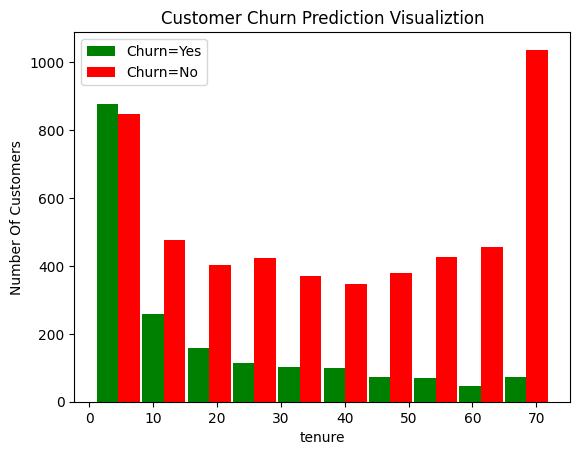

In [17]:
tenure_churn_no = df2[df2.Churn==0].tenure
tenure_churn_yes = df2[df2.Churn==1].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

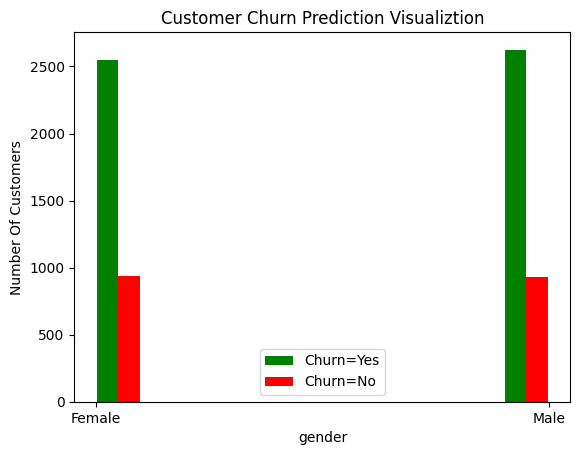

In [18]:
gender_churn_no = df0[df0.Churn=='Yes'].gender
gender_churn_yes = df0[df0.Churn=='No'].gender

plt.xlabel("gender")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([gender_churn_yes, gender_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

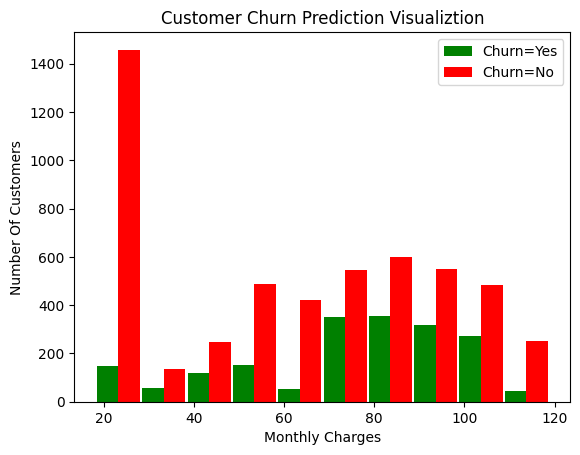

In [19]:
mc_churn_no = df0[df0.Churn=='No'].MonthlyCharges      
mc_churn_yes = df0[df0.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# Sacling The MonthlyCharges	TotalCharges columns

In [21]:
from sklearn.preprocessing import MinMaxScaler

df3 = df2.copy()
sc = MinMaxScaler()

df3[[ "MonthlyCharges"	,"TotalCharges" , 'tenure']] = sc.fit_transform(df2[[ "MonthlyCharges"	,"TotalCharges", 'tenure']])
df3[[ "MonthlyCharges"	,"TotalCharges" , 'tenure']].describe()


,MonthlyCharges,TotalCharges,tenure
count,7032.000000,7032.000000,7032.000000
mean,0.463166,0.261309,0.442560
std,0.299363,0.261571,0.345708
min,0.000000,0.000000,0.000000
25%,0.172512,0.044155,0.112676
50%,0.518408,0.159090,0.394366
75%,0.712562,0.435719,0.760563
max,1.000000,1.000000,1.000000


# One hot encoding on Discrete variables

In [23]:
discrete_var = ['InternetService' , 'Contract' , 'PaymentMethod']
dummies = pd.get_dummies( df3[discrete_var] , drop_first=True)

dummies.replace(True,1,inplace=True)
dummies.replace(False,0,inplace=True)

reduced_df  = df3.drop( discrete_var  , axis=1)
df_final = pd.concat([dummies , reduced_df  ] , axis=1 )
df_final.head()

,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0.115423,0.001275,0
1,1,0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0.385075,0.215867,0
2,1,0,0,0,0,0,1,1,0,0,...,1,1,0,0,0,0,1,0.354229,0.010310,1
3,1,0,1,0,0,0,0,1,0,0,...,1,0,1,1,0,0,0,0.239303,0.210241,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0.521891,0.015330,1


In [24]:
df_final.dtypes

InternetService_DSL                        int64
InternetService_Fiber optic                int64
Contract_One year                          int64
Contract_Two year                          int64
PaymentMethod_Credit card (automatic)      int64
PaymentMethod_Electronic check             int64
PaymentMethod_Mailed check                 int64
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling    

# splitting the train test

In [25]:
X = df_final.drop('Churn' , axis = 1)
y = df3['Churn']

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size=0.3 ,random_state=25 )
x_train.shape , x_test.shape 

((4922, 23), (2110, 23))

In [27]:
y_train.shape

(4922,)

In [35]:
model = keras.Sequential([
    
    keras.layers.Dense(  23, input_shape = ( 23 , )  , activation = 'relu'   ),
    keras.layers.Dense(  15  , activation = 'relu'  ),
    keras.layers.Dense(  1   , activation = 'sigmoid')   
] )
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile( 
              optimizer=opt,
              loss ='binary_crossentropy',
              metrics = ['accuracy']
              )

model.fit(x_train , y_train , epochs=50)

Epoch 1/50
154/154 [==============================] - 3s 4ms/step - loss: 0.4480 - accuracy: 0.7818
Epoch 2/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4220 - accuracy: 0.8009
Epoch 3/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4183 - accuracy: 0.8056
Epoch 4/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4144 - accuracy: 0.8082
Epoch 5/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4170 - accuracy: 0.8058
Epoch 6/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4093 - accuracy: 0.8117
Epoch 7/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4081 - accuracy: 0.8108
Epoch 8/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4050 - accuracy: 0.8149
Epoch 9/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4048 - accuracy: 0.8106
Epoch 10/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4015 - accuracy: 0.8117

In [36]:
model.evaluate(x_test , y_test)

66/66 [==============================] - 1s 3ms/step - loss: 0.5124 - accuracy: 0.7796


[0.5124375820159912, 0.7796208262443542]

In [41]:
def convert_pred(y):
    return np.array(  list(map( lambda x  : 1 if x >= 0.5  else 0  , y) ))

convert_pred([0.2, 0.8])

array([0, 1])

In [45]:
y_pred = model.predict(x_test)
y_pred = convert_pred( y_pred)

66/66 [==============================] - 0s 3ms/step


In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1553
           1       0.60      0.49      0.54       557

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



Text(95.72222222222221, 0.5, 'Truth')

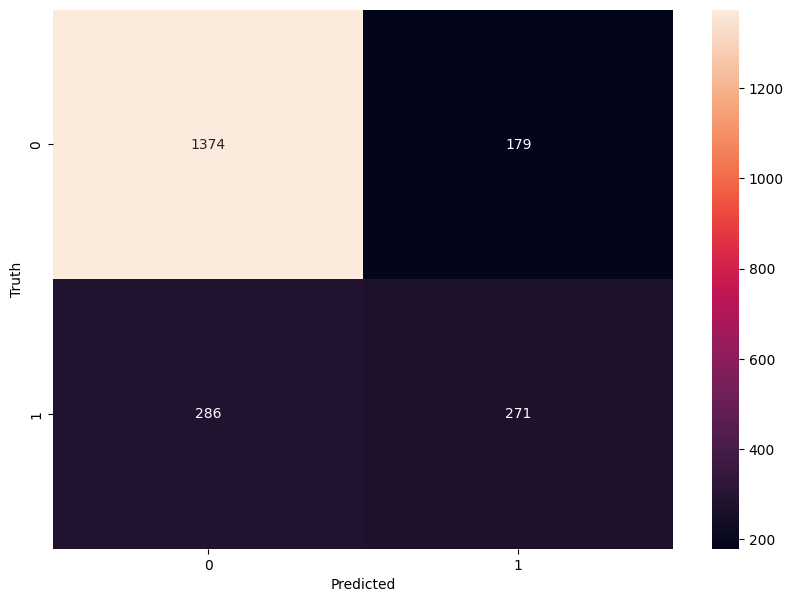

In [48]:
import seaborn as sn
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Precision

In [52]:
precision_0 = 1374 / (1374 + 286)
precision_1 = 271 / (271+179)
precision_0 , precision_1

(0.827710843373494, 0.6022222222222222)

recall

In [53]:
recall_0 = 1374 / (1374 + 179)
recall_1 = 271 / (271+286)
recall_0 , recall_1

(0.8847392144236961, 0.4865350089766607)

accuracy

In [54]:
round((862+229)/(862+229+137+179),2)

0.78